## Vector dimension reduction

When an embedding model supports MRL (Matryoshka Representation Learning), we can use it to reduce the dimensionality of the vectors. For large vector indexes, this can help to speed up search and reduce storage costs.

In [4]:
# Load in the vectors from movies.json, {movie: [vector]}
import json

with open('embeddings/movies_text-embedding-3-small-1536.json') as f:
    movies_1536 = json.load(f)

with open('embeddings/movies_text-embedding-3-small-256.json') as f:
    movies_256t = json.load(f)

print(len(movies_1536['Moana']))
print(movies_1536['Moana'][0:4])

print(len(movies_256t['Moana']))
print(movies_256t['Moana'][0:4])

1536
[0.03265173360705376, 0.01370371412485838, -0.017748944461345673, 0.024719391018152237]
256
[0.06316128373146057, 0.02650836855173111, -0.03433343395590782, 0.04781701788306236]


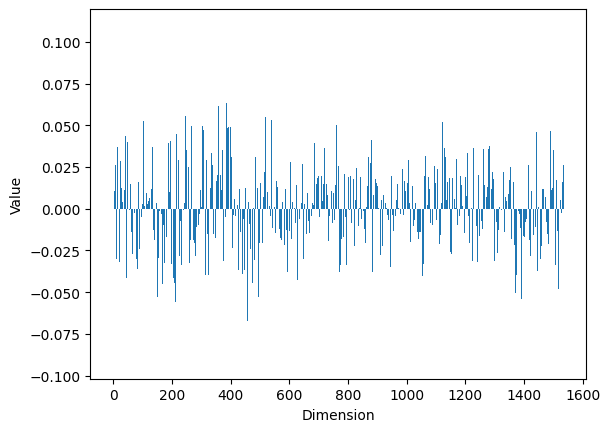

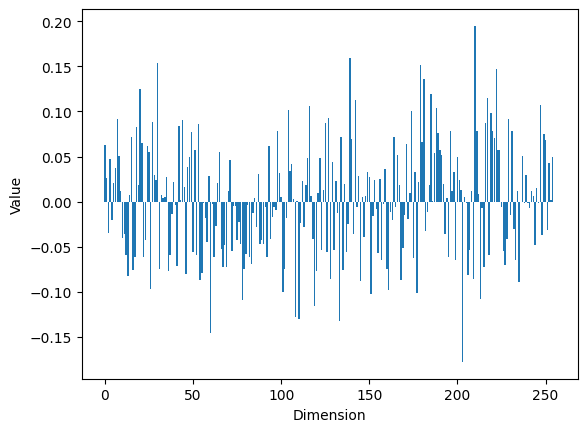

In [5]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualize the values of the vector in a bar chart"""
    plt.bar(range(len(vector)), vector)
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.show()

render_vector(movies_1536['Moana'])
render_vector(movies_256t['Moana'])

In [ ]:
# 10 most similar movies
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

def most_similar(movie, movies):
    movie_vec = movies[movie]
    similarities = {k: cosine_similarity([movie_vec], [v])[0][0] for k, v in movies.items()}
    closest = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(closest, columns=['movie', 'similarity'])
    return df

most_similar('Moana', movies_1536)[:10]

,movie,similarity
0,Moana,1.000000
1,Mulan,0.546800
2,Lilo & Stitch,0.502114
3,The Little Mermaid,0.498209
4,Big Hero 6,0.491800
5,Monsters University,0.484857
6,The Princess and the Frog,0.471984
7,Finding Dory,0.471386
8,Maleficent,0.461029
9,Ice Princess,0.457817


In [9]:
most_similar('Moana', movies_256t)[:10]

,movie,similarity
0,Moana,1.000000
1,The Little Mermaid,0.587367
2,Mulan,0.583428
3,Lilo & Stitch,0.575990
4,Big Hero 6,0.574590
5,The Princess and the Frog,0.568726
6,Finding Dory,0.549391
7,The Lion King,0.521125
8,Tangled,0.513131
9,Maleficent,0.511412


## Size comparison

In [10]:
import sys

pd.DataFrame({
    '1536': [sys.getsizeof(movies_1536['Moana'])],
    '256': [sys.getsizeof(movies_256t['Moana'])],
})

,1536,256
0,12728,2200


In [40]:
# Now convert each to numpy arrays of the appropriate type
import numpy as np
def convert_to_numpy(movies, dtype):
    return {
        movie: np.array(embedding, dtype=dtype)
        for movie, embedding in movies.items()
    }
movies_float64 = convert_to_numpy(movies, np.float64)
movies_int8 = convert_to_numpy(movies_1byte, np.int8)
movies_int1 = convert_to_numpy(movies_1bit, np.int8)
# Check the size of each numpy array
print("Size of movies_float64:", sys.getsizeof(movies_float64['Moana']))
print("Size of movies_int8:", sys.getsizeof(movies_int8['Moana']))
print("Size of movies_int1:", sys.getsizeof(movies_int1['Moana']))

Size of movies_float64: 12400
Size of movies_int8: 1648
Size of movies_int1: 1648


In [39]:
sys.getsizeof(movies['Moana'])/sys.getsizeof(movies_1byte['Moana'])

1.0

## Resources

* [Scalar quantization 101](https://www.elastic.co/search-labs/blog/scalar-quantization-101)
* [Product quantization 101](https://www.pinecone.io/learn/series/faiss/product-quantization/)
* [Binary and scalar quantization](https://huggingface.co/blog/embedding-quantization)